**Zum Spielen**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Als erstes importieren wir unser github Repo. Der nächste Schritt ist der import des Datasets.


In [ ]:
!wget https://raw.githubusercontent.com/DeamonAmelie/heart/main/heart.csv


--2021-05-19 16:05:14--  https://raw.githubusercontent.com/DeamonAmelie/heart/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2021-05-19 16:05:15 (87.4 MB/s) - ‘heart.csv’ saved [11323/11323]



In [43]:
df = pd.read_csv("/content/heart.csv")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Beschreibung der Daten

    age - age in years

    sex - sex (1 = male; 0 = female)

    cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

    trestbps - resting blood pressure (in mm Hg on admission to the hospital)

    chol - serum cholestoral in mg/dl

    fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

    restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

    thalach - maximum heart rate achieved

    exang - exercise induced angina (1 = yes; 0 = no)

    oldpeak - ST depression induced by exercise relative to rest

    slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

    ca - number of major vessels (0-3) colored by flourosopy

    thal(thallium stress)- 0 to 3

    Output- 0(less chance of heart attack) and 1(more chance of heart attack)



## EDA 


*   Daten darstellen
*   Daten transformieren ?
* Daten nochmal darstellen
* Korrelation darstellen
* ...



In [47]:
def plotting_con_features(nrows,ncols,con_features):
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(28,40))
    f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            if(i==0): #For [0,0] sub plot
                if(j==0):
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot of\ncontinuous features",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=40,fontstyle='italic')
                elif(j==1): #For [0,1] subplot
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot with respect to\ntarget",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=40,fontstyle='italic')

            else:        
                #Without hueness
                if(j==0):
                    a1=sns.histplot(data=df,x=con_columns[i-1],palette='rocket',ax=ax[i][j],kde=True)
                #With hueness
                elif(j==1):
                    a2=sns.histplot(data=df,x=con_columns[i-1],hue='output',ax=ax[i][j],palette='rocket',multiple='stack',kde=True)

                #Dealing with spines
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].spines['left'].set_visible(False)
                ax[i][j].grid(linestyle="--",axis='y',color='gray')

IndexError: ignored

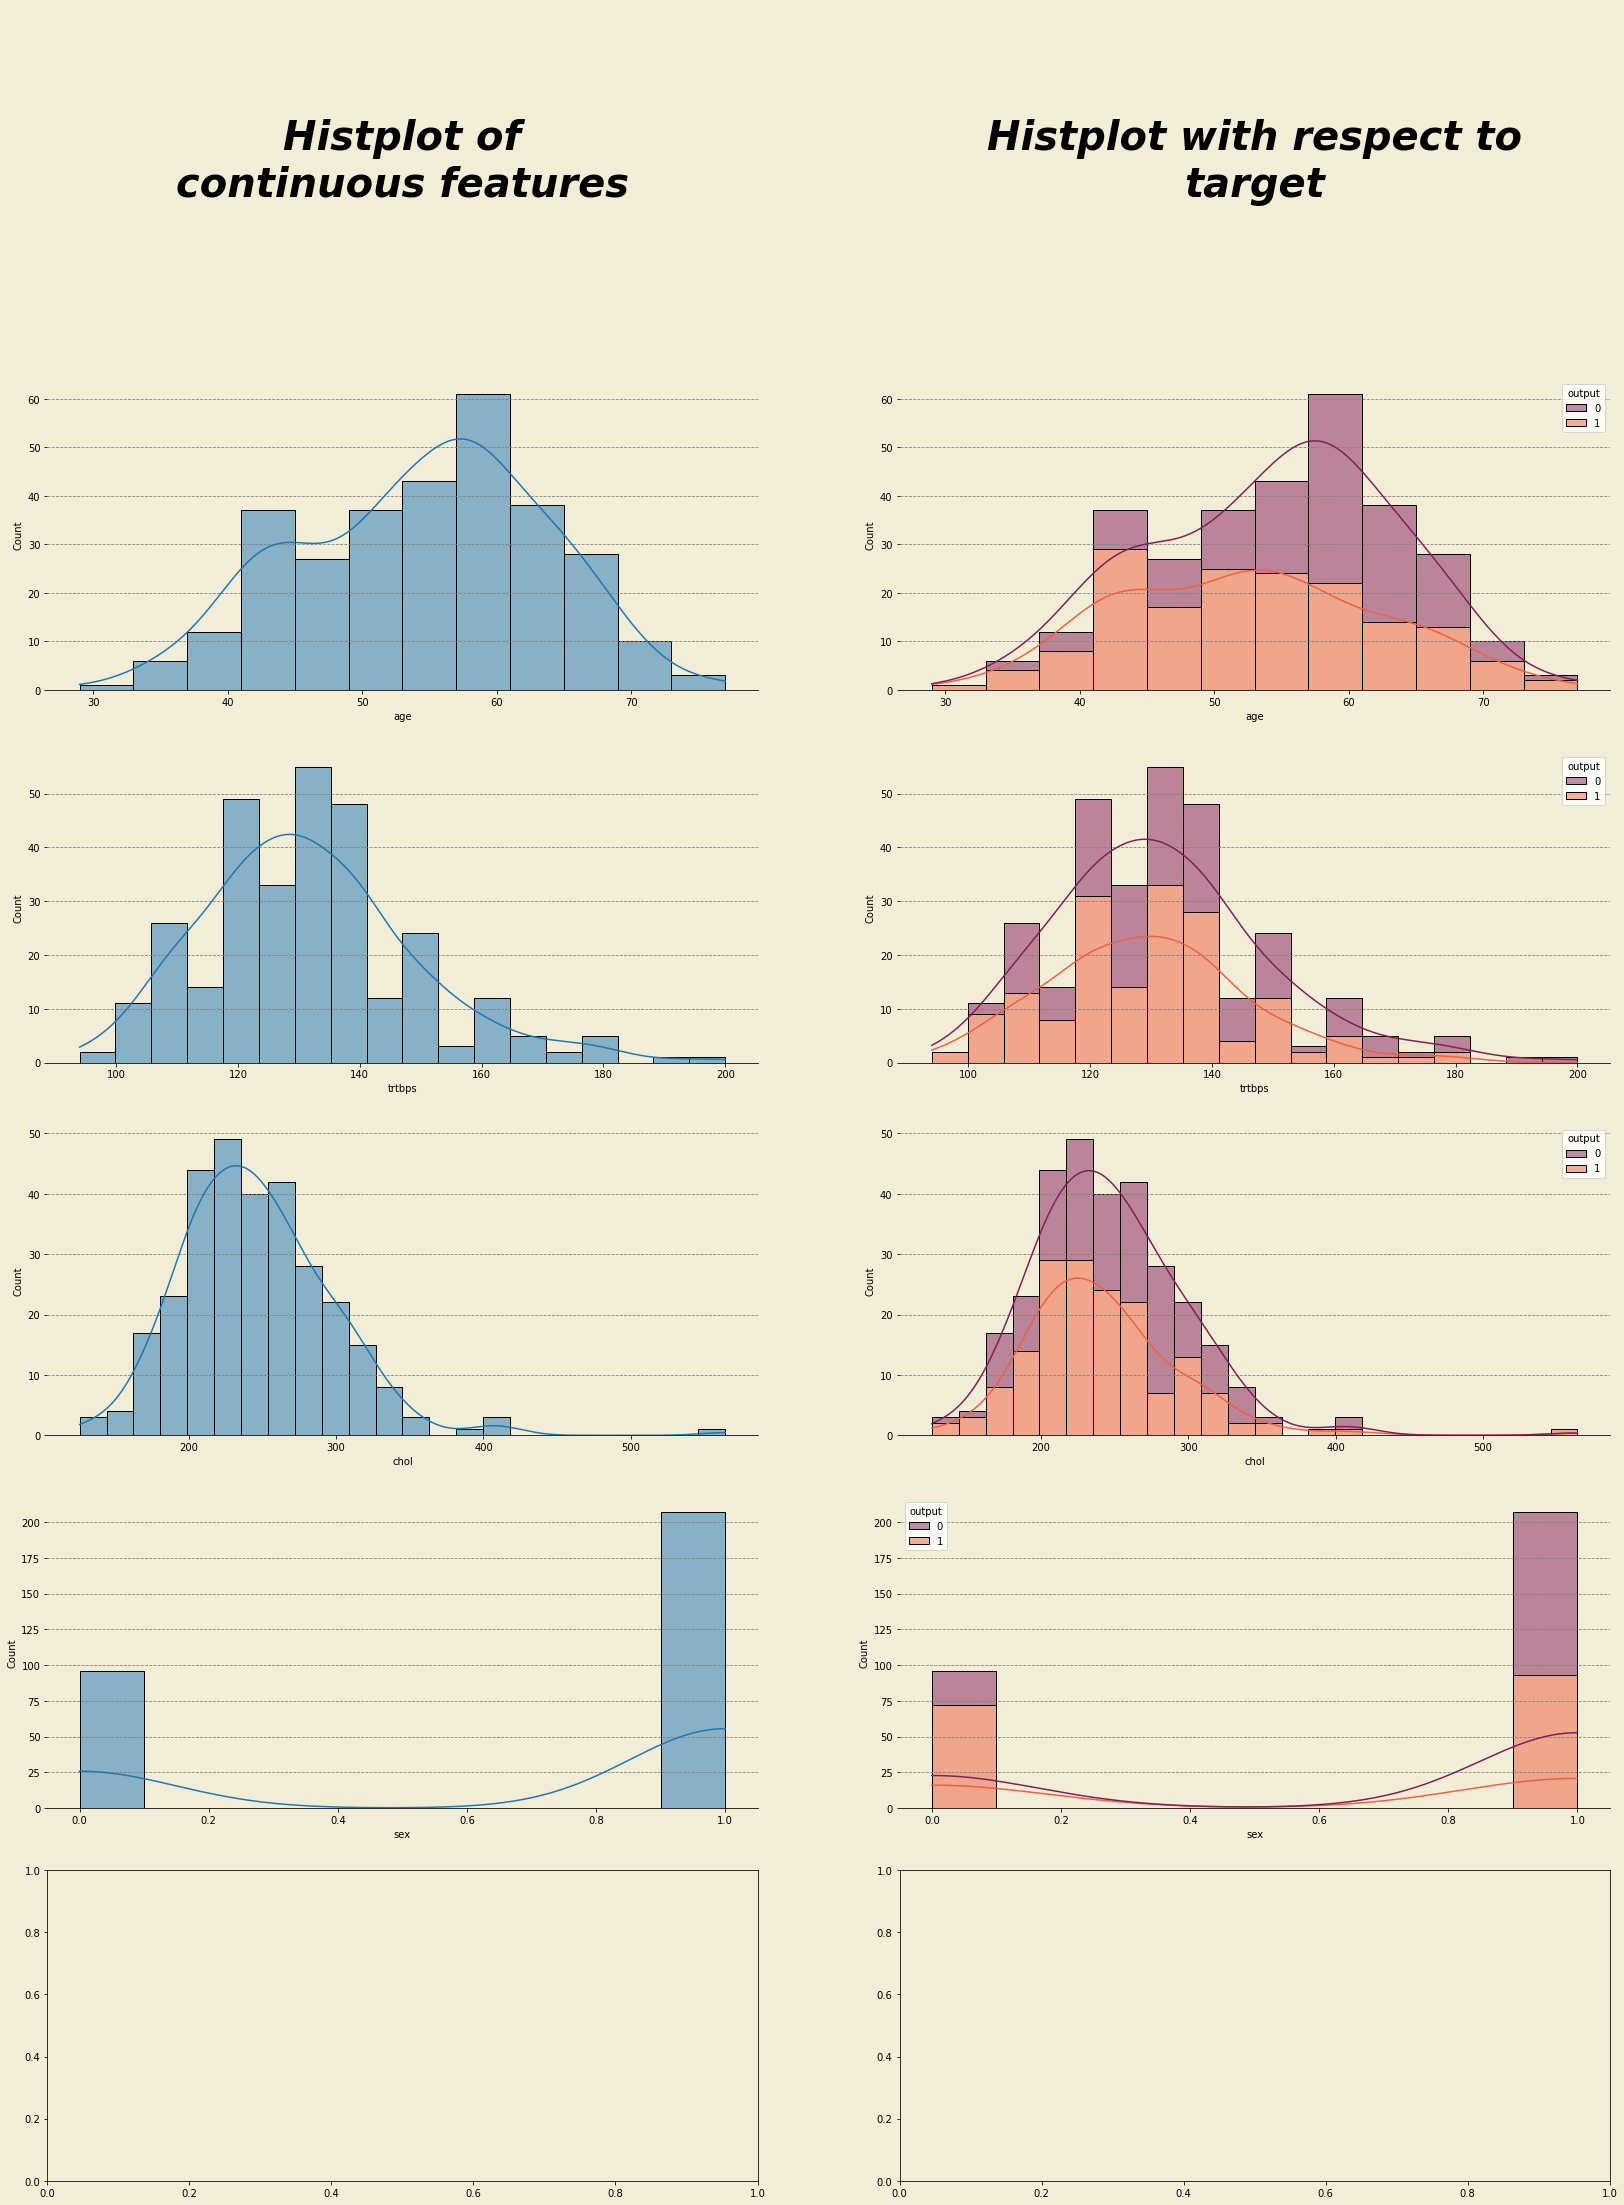

In [49]:
con_columns=['age' , 'trtbps' , 'chol' , 'sex']
plotting_con_features(6,2,con_columns)